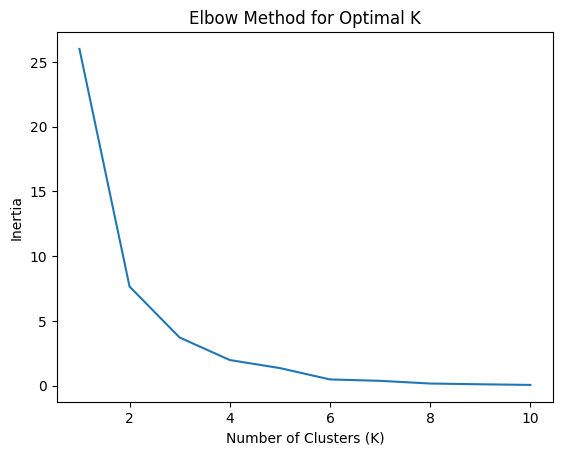

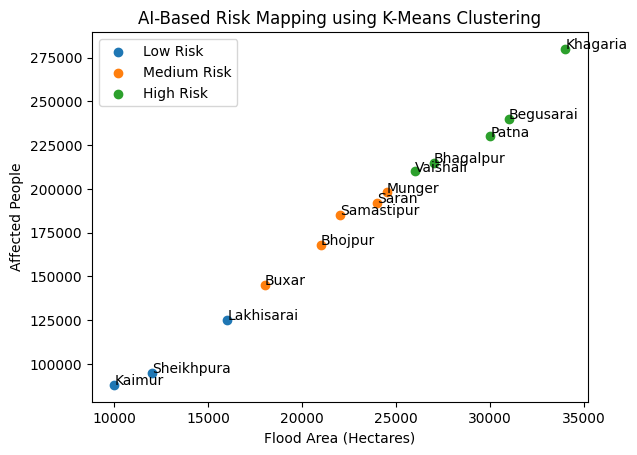

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
path = r"F:\PythonL\Data\Bihar_Flood_Data.xlsx"
data = pd.read_excel(path)

features = data[["Flood_Area_Ha", "Affected_People"]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# -----------------------------
# 1️⃣ Elbow Method
# -----------------------------
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# -----------------------------
# 2️⃣ Apply K-Means (K=3)
# -----------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
data["Cluster"] = kmeans.fit_predict(scaled_features)

# Sort clusters by flood area mean
cluster_means = data.groupby("Cluster")["Flood_Area_Ha"].mean().sort_values()

risk_mapping = {}
risk_mapping[cluster_means.index[0]] = "Low Risk"
risk_mapping[cluster_means.index[1]] = "Medium Risk"
risk_mapping[cluster_means.index[2]] = "High Risk"

data["Risk_Level"] = data["Cluster"].map(risk_mapping)

# -----------------------------
# 3️⃣ Graph with Legend
# -----------------------------
plt.figure()

for risk in ["Low Risk", "Medium Risk", "High Risk"]:
    subset = data[data["Risk_Level"] == risk]
    plt.scatter(
        subset["Flood_Area_Ha"],
        subset["Affected_People"],
        label=risk
    )

for i in range(len(data)):
    plt.text(
        data["Flood_Area_Ha"][i],
        data["Affected_People"][i],
        data["District"][i]
    )

plt.xlabel("Flood Area (Hectares)")
plt.ylabel("Affected People")
plt.title("AI-Based Risk Mapping using K-Means Clustering")

plt.legend(loc="upper left")
plt.show()